# Дипломный проект 

"Анализ данных США 1970х гг. на предмет определения социального развития"  

Целью работы является определение наиболее благоприятных штатов для жизни по следующим признакам:

1) Высокий доход

2) Образованность

3) Благополучная криминальная обстановка 

4) Высокая продолжительность жизни

5) Благоприятные климатические условия

Параллельно определим и те штаты, которые испытывают проблемы с социальным развитием.


Описание датасета с пояснениями по каждой колонке:

Context
In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation.

Content
This dataset has 50 observations (one for each US state) and the following 15 variables:

Population (Население) - численность населения в штате в 1975 г. (в тыс.).

Income (Доход) - доход на душу населения в 1974 г. (за год)

Illiteracy (Неграмотность) - уровень неграмотности в 1970 г. (в процентах к населению). 

Life.Exp (Ожидаемая продолжительность жизни) - ожидаемая продолжительность жизни в годах жителей штата в 1970 г. 

Murder (убийства) - количество убитых (как умышленно, так и без умысла) на 100 000 населения в 1976 г.

HS.Grad - - процент выпускников средней школы в 1970 г. 

Frost - среднее число дней с минимальной температурой ниже нуля с 1931–1960 гг. в столице или крупном городе 
штата.

Area - площадь суши (в квадратных милях) штата.

state.abb - аббревиатура для каждого штата.

state.area - площадь каждого штата (в квадратных милях). 

x - долгота центра штата. 

y - широта центра штата.

state.division - округ, к которому принадлежит каждый штат (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, or Pacific). 

state.name - полное название штата. 

state.region - регион, к которому относится каждый штат (Northeast, South, North Central, or West).


In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind as ttest

In [108]:
data = pd.read_csv('/home/anastacia/python_netology/statedata.csv')
data.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
Population        50 non-null int64
Income            50 non-null int64
Illiteracy        50 non-null float64
Life.Exp          50 non-null float64
Murder            50 non-null float64
HS.Grad           50 non-null float64
Frost             50 non-null int64
Area              50 non-null int64
state.abb         50 non-null object
state.area        50 non-null int64
x                 50 non-null float64
y                 50 non-null float64
state.division    50 non-null object
state.name        50 non-null object
state.region      50 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 5.9+ KB


Как видим, датасет не содержит нулевых значений, цифровые значения указаны в числовых форматах.

Для удобства последующего анализа, датасет разделим по схеме "звезда" по четырем следующим категориям: state, money, climate, criminal. И для удобства понимания изобразим это в виде схемы.

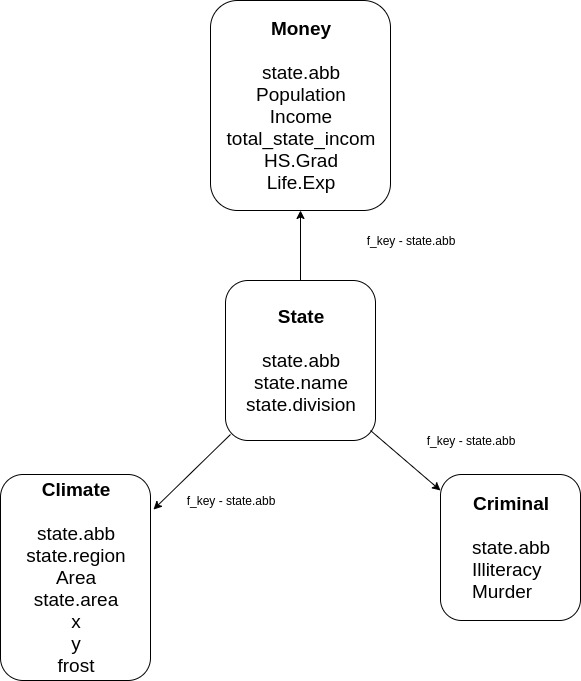

In [110]:
from IPython.display import Image 
Image('/home/anastacia/python_netology/Star.jpg', width=300, height=300) 

In [115]:
#добавим колонку "общий доход по штату (перемножаем население на подушевный доход)"
data['total_state_income'] = data['Population']*data['Income']
data.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region,total_state_income
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South,13100760
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West,2304975
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West,10020360
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South,7127580
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West,108406572


Посмотрим средние значения по округам и регионам. 

In [111]:
data.groupby(['state.region']).mean()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
state.region,,,,,,,,,,,
North Central,4803.000000,4611.083333,0.700000,71.766667,5.275000,54.516667,138.833333,62652.000,63794.166667,-92.562783,42.171567
Northeast,5495.111111,4570.222222,1.000000,71.264444,4.722222,53.966667,132.777778,18141.000,18817.000000,-72.756411,42.535956
South,4208.125000,4011.937500,1.737500,69.706250,10.581250,44.343750,64.625000,54605.125,56222.250000,-85.174487,34.610344
West,2915.307692,4702.615385,1.023077,71.234615,7.215385,62.000000,102.153846,134463.000,137227.692308,-114.988769,40.606854


Становится очевидно, что основные проблемы в южном регионе. Благополучный регион - север.

In [112]:
data.groupby(['state.division']).mean()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.area,x,y
state.division,,,,,,,,,,,
East North Central,8189.000000,4669.000000,0.800000,70.990000,7.780000,53.200000,129.400000,48820.200000,49656.600000,-86.547160,41.609960
East South Central,3379.000000,3563.750000,1.950000,69.337500,12.300000,40.650000,58.750000,44745.500000,45491.000000,-86.945200,34.583525
Middle Atlantic,12423.000000,4863.000000,1.166667,70.636667,7.400000,51.800000,107.666667,33439.333333,34248.333333,-75.609500,41.335567
Mountain,1203.125000,4402.250000,0.950000,70.947500,7.187500,61.412500,135.000000,107005.875000,107985.875000,-110.220875,39.878013
New England,2031.166667,4423.833333,0.916667,71.578333,3.383333,55.050000,145.333333,10491.833333,11101.333333,-71.329867,43.136150
Pacific,5654.800000,5183.200000,1.140000,71.694000,7.260000,62.940000,49.600000,178394.400000,184014.600000,-122.617400,41.773000
South Atlantic,4118.250000,4355.250000,1.500000,69.526250,9.775000,45.725000,75.625000,33363.625000,34838.375000,-79.316225,35.398088
West North Central,2384.428571,4569.714286,0.628571,72.321429,3.485714,55.457143,145.571429,72531.857143,73892.428571,-96.859657,42.572714
West South Central,5217.000000,3773.500000,2.000000,70.435000,10.475000,45.275000,48.500000,106947.750000,109721.250000,-95.120300,33.061675


По округам - проблемы зашкаливают в штатах на юго-востоке страны (East South Central) и южной атлантике (South Atlantic). Благополучно, к примеру, на побережье Тихого океана (Pacific), северо-западе (West North Central). 

Чтобы рассмотреть каждый штат на предмет благополучия, разделим датасет, как приведено выше на схеме. И, заодно, сохраним данные в файл csv. 

In [116]:
money = data[['state.abb', 'Population', 'Income', 'total_state_income', 'HS.Grad', 'Life.Exp']]
money.to_csv('money.csv', index=False)
money.head()

,state.abb,Population,Income,total_state_income,HS.Grad,Life.Exp
0,AL,3615,3624,13100760,41.3,69.05
1,AK,365,6315,2304975,66.7,69.31
2,AZ,2212,4530,10020360,58.1,70.55
3,AR,2110,3378,7127580,39.9,70.66
4,CA,21198,5114,108406572,62.6,71.71


In [120]:
state = data[['state.abb', 'state.name', 'state.division']]
state.to_csv('state.csv', index=False)
state.head()

,state.abb,state.name,state.division
0,AL,Alabama,East South Central
1,AK,Alaska,Pacific
2,AZ,Arizona,Mountain
3,AR,Arkansas,West South Central
4,CA,California,Pacific


In [119]:
climate = data[['state.abb', 'state.region', 'Area', 'state.area', 'x', 'y', 'Frost']]
climate.to_csv('climate.csv', index=False)
climate.head()

,state.abb,state.region,Area,state.area,x,y,Frost
0,AL,South,50708,51609,-86.7509,32.5901,20
1,AK,West,566432,589757,-127.2500,49.2500,152
2,AZ,West,113417,113909,-111.6250,34.2192,15
3,AR,South,51945,53104,-92.2992,34.7336,65
4,CA,West,156361,158693,-119.7730,36.5341,20


In [32]:
criminal = data[['state.abb', 'Illiteracy', 'Murder']]
criminal.to_csv('criminal.csv', index=False)
criminal.head()

,state.abb,Illiteracy,Murder
0,AL,2.1,15.1
1,AK,1.5,11.3
2,AZ,1.8,7.8
3,AR,1.9,10.1
4,CA,1.1,10.3


После разделения и предподготовки датасета можно преступить к анализу по следующим параметрам:

1) Найдем зависимости по каждому датасету с последующими выводами.

2) Какие штаты имеют самые высокие показатели по общему доходу, образованности, предположительной продолжительности жизни и какие - самый низкий по данным параметрам.

3) Какие штаты самые холодные, а какие - самые теплый. Зависит ли это от долготы/широты.

4) В каких штатах высокий уровень убийств (как умышленных, так и совершенных без умысла), в каком - низкий.

5) Есть ли зависимость преступности от уровня безграмотности и продолжительности жизни.


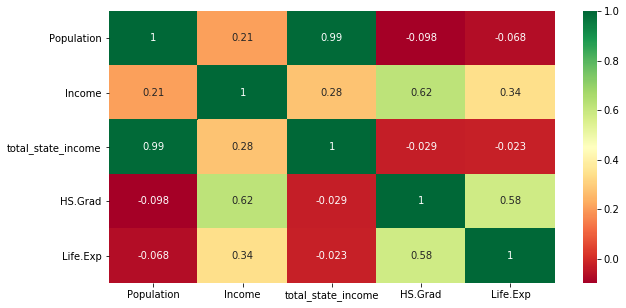

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(money.corr(),annot=True,cmap="RdYlGn");

На данной матрице видим очевидные зависимости: 

1) Population к total_state_income - что объяснимо: чем больше людей в штате, тем больше совокупный доход в штате.

2) Income к HS.Grad - тоже понятно: чем выше процент выпускников в штате, тем больше людей продолжают учиться дальше, получают профессию и, соответственно, тем самым увеличивают доход - как свой, так и штата.

3) Life.Exp к HS.Grad - предположительная длительность жизни зависит от уровня образованности. Что вполне понятно: образованный человек имеет больший доход и, соответственно, лучшее качество жизни. 

In [73]:
Population_top = money.groupby('state.abb')[['Population']].sum()\
    .sort_values('Population', ascending=False).head(5)
    
Population_top

,Population
state.abb,
CA,21198
NY,18076
TX,12237
PA,11860
IL,11197


Самая большая численность населения - в Калифорнии

In [71]:
Population_antitop = money.groupby('state.abb')[['Population']].sum()\
    .sort_values('Population', ascending=True).head(5)
    
Population_antitop

,Population
state.abb,
AK,365
WY,376
VT,472
DE,579
NV,590


Самая низкая популяция - в Аляске

In [72]:
Income_top = money.groupby('state.abb')[['Income']].sum()\
    .sort_values('Income', ascending=False).head(5)
    
Income_top

,Income
state.abb,
AK,6315
CT,5348
MD,5299
NJ,5237
NV,5149


В Аляске не только численность населения низкая, но еще и доход населения высокий. Как и Невада - 5ая по малочисленности, но и занимает 5 место по уровню дохода.

In [80]:
Income_antitop = money.groupby('state.abb')[['Income']].sum()\
    .sort_values('Income', ascending=True).head(5)
    
Income_antitop

,Income
state.abb,
MS,3098
AR,3378
LA,3545
NM,3601
WV,3617


В Миссисипе доход самый низкий у населения.

In [82]:
HS_Grad_top = money.groupby('state.abb')[['HS.Grad']].sum()\
    .sort_values('HS.Grad', ascending=False).head(5)
    
HS_Grad_top

,HS.Grad
state.abb,
UT,67.3
AK,66.7
NV,65.2
CO,63.9
WA,63.5


Юта самый образованный штат. Но и Аляска с Невадой, не смотря на малочисленность штата, следуют сразу за Ютой.

In [75]:
HS_Grad_antitop = money.groupby('state.abb')[['HS.Grad']].sum()\
    .sort_values('HS.Grad', ascending=True).head(5)
    
HS_Grad_antitop

,HS.Grad
state.abb,
SC,37.8
NC,38.5
KY,38.5
AR,39.9
GA,40.6


А вот в Южной Каролине грустно.

In [77]:
Life_Exp_top = money.groupby('state.abb')[['Life.Exp']].sum()\
    .sort_values('Life.Exp', ascending=False).head(5)
    
Life_Exp_top

,Life.Exp
state.abb,
HI,73.60
MN,72.96
UT,72.90
ND,72.78
NE,72.60


На Гаваях люди живут дольше, чем в прочих штатах. И это неудивительно :))
    
Но интересно, что в данной выборке видим Юту, в которoй хороший уровень образования. 

In [78]:
Life_Exp_antitop = money.groupby('state.abb')[['Life.Exp']].sum()\
    .sort_values('Life.Exp', ascending=True).head(5)
    
Life_Exp_antitop

,Life.Exp
state.abb,
SC,67.96
MS,68.09
GA,68.54
LA,68.76
NV,69.03


В Южной Каролине не только самый низкий уровень образованности, так и продолжительность жизни - ниже всех прочих штатов.

In [83]:
#для наглядности выведем все штаты и все данные по ним
money.style.bar()

,state.abb,Population,Income,total_state_income,HS.Grad,Life.Exp
0,AL,3615,3624,13100760,41.3,69.05
1,AK,365,6315,2304975,66.7,69.31
2,AZ,2212,4530,10020360,58.1,70.55
3,AR,2110,3378,7127580,39.9,70.66
4,CA,21198,5114,108406572,62.6,71.71
5,CO,2541,4884,12410244,63.9,72.06
6,CT,3100,5348,16578800,56,72.48
7,DE,579,4809,2784411,54.6,70.06
8,FL,8277,4815,39853755,52.6,70.66
9,GA,4931,4091,20172721,40.6,68.54


Изучив основные данные из датасета money, можно перейти к climate.

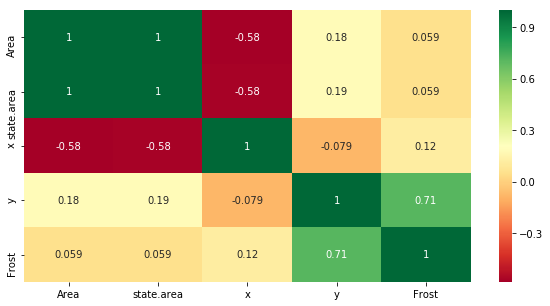

In [86]:
#посмотрим взаимосвязи
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(climate.corr(),annot=True,cmap="RdYlGn");

Что видно сразу - очевидная зависимость количества холодных дней от y (широта), при этом от x (долготы) температура зависит мало. 

Посмотрим холодные и теплые штаты.

In [87]:
Frost_top = climate.groupby('state.abb')[['Frost']].sum()\
    .sort_values('Frost', ascending=False).head(5)
    
Frost_top

,Frost
state.abb,
NV,188
ND,186
NH,174
WY,173
SD,172


Странно не видеть Аляску в топ самых холодных штатов (забегая вперед, у Аляски 152 дня в году холодных дней). Невада с высоким уровнем образования и высоким доходом на душу населения, но еще и самый холодный и малонаселенный штат. 

In [88]:
Frost_free = climate.groupby('state.abb')[['Frost']].sum()\
    .sort_values('Frost', ascending=True).head(5)
    
Frost_free

,Frost
state.abb,
HI,0
FL,11
LA,12
AZ,15
AL,20


Гаваи - климатический рай, где живут долгожители. Интересная зависимость - чем теплее, тем дольше продолжительность жизни.

Посмотрим и сравним штаты по широте.

In [92]:
y_north = climate.groupby('state.abb')[['y']].sum()\
    .sort_values('y', ascending=False).head(5)
    
y_north

,y
state.abb,
AK,49.2500
WA,47.4231
ND,47.2517
MT,46.8230
MN,46.3943


Здесь мы видим, что не смотря на то, что Аляска - не самый холодный штат, все же является самым северным штатом.

In [93]:
y_south = climate.groupby('state.abb')[['y']].sum()\
    .sort_values('y', ascending=True).head(5)
    
y_south

,y
state.abb,
FL,27.8744
LA,30.6181
TX,31.3897
HI,31.7500
GA,32.3329


По результатам анализа широты - все самые теплые штаты находятся на юге и в них продолжительность жизни - выше прочих.

In [94]:
#для наглядности выведем все штаты и все данные по ним
climate.style.bar()

,state.abb,state.region,Area,state.area,x,y,Frost
0,AL,South,50708,51609,-86.7509,32.5901,20
1,AK,West,566432,589757,-127.25,49.25,152
2,AZ,West,113417,113909,-111.625,34.2192,15
3,AR,South,51945,53104,-92.2992,34.7336,65
4,CA,West,156361,158693,-119.773,36.5341,20
5,CO,West,103766,104247,-105.513,38.6777,166
6,CT,Northeast,4862,5009,-72.3573,41.5928,139
7,DE,South,1982,2057,-74.9841,38.6777,103
8,FL,South,54090,58560,-81.685,27.8744,11
9,GA,South,58073,58876,-83.3736,32.3329,60


Перейдем к криминальной составляющей. Проанализируем датасет criminal.

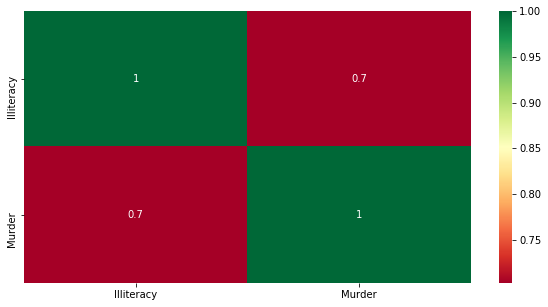

In [96]:
#посмотрим взаимосвязи
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(criminal.corr(),annot=True,cmap="RdYlGn");

Корреляция между неграмотностью и уровнем убийств - очевидна.

In [100]:
Illiteracy = criminal.groupby('state.abb')[['Illiteracy']].sum()\
    .sort_values('Illiteracy', ascending=False).head(5)
Illiteracy

,Illiteracy
state.abb,
LA,2.8
MS,2.4
SC,2.3
TX,2.2
NM,2.2


Лидер по безграмотности - Луизианна. Дальше знакомые по антирейтингу - Миссисипи, Северная Каролина. 

In [101]:
Illiteracy_min = criminal.groupby('state.abb')[['Illiteracy']].sum()\
    .sort_values('Illiteracy', ascending=True).head(5)
Illiteracy_min

,Illiteracy
state.abb,
SD,0.5
NV,0.5
IA,0.5
WY,0.6
NE,0.6


Южная Дакота - лидер по отсутствию безграмотности, за ней следуют Невада (известная по высоким рейтингам по прочим параметрам).

In [102]:
Murder = criminal.groupby('state.abb')[['Murder']].sum()\
    .sort_values('Murder', ascending=False).head(5)
Murder

,Murder
state.abb,
AL,15.1
GA,13.9
LA,13.2
MS,12.5
TX,12.2


In [103]:
Murder_min = criminal.groupby('state.abb')[['Murder']].sum()\
    .sort_values('Murder', ascending=True).head(5)
Murder_min

,Murder
state.abb,
ND,1.4
SD,1.7
MN,2.3
IA,2.3
RI,2.4


In [104]:
#для наглядности выведем все штаты и все данные по ним
criminal.style.bar()

,state.abb,Illiteracy,Murder
0,AL,2.1,15.1
1,AK,1.5,11.3
2,AZ,1.8,7.8
3,AR,1.9,10.1
4,CA,1.1,10.3
5,CO,0.7,6.8
6,CT,1.1,3.1
7,DE,0.9,6.2
8,FL,1.3,10.7
9,GA,2,13.9


Для наглядности вышеизложенной информации по анализу составим дашборды:

<html>
 <head></head>
 <body>
     <a href="https://datastudio.google.com/reporting/c3f58680-2648-4539-8ab0-09a16c664ba6/page/XNwCB">Влияние климата на численность населения и продолжительность жизни</a>
 </body>
</html>

<html>
 <head></head>
 <body>
     <a href="https://datastudio.google.com/reporting/f00ecd53-bf35-491b-8f1c-19122c22d902/page/1dxCB">Зависимость дохода от уровня образованности</a>
 </body>
</html>

<html>
 <head></head>
 <body>
     <a href="https://datastudio.google.com/reporting/5c602876-1369-4d22-a6b9-ca06902a651d/page/7eyCB">Взаимосвязь штатов с низкой грамотностью населения и количеством тяжких преступлений</a>
 </body>
</html>
    